## Data cleaning and preparing

In [1]:
#### Prepare Min.Wage data 2001-2017
import pandas as pd
wage = pd.read_csv("/work/Minimum Wage Data.csv")
wage = wage.iloc[:, :3]
wage = wage[(wage['Year'] >= 2001) & (wage['Year'] <= 2017)]
wage = wage.rename(columns={
    'State.Minimum.Wage': 'Min.Wage'})

# Check the year for each non_state
filtered_wage = wage[wage['Min.Wage'] == 0][['Year', 'State']]
non_state_counts = filtered_wage['State'].value_counts() # Tennessee, South Carolina, Alabama, Louisiana,Mississippi(17); Arizona(6),Florida(5), Puerto Rico(4)
arizona_years = filtered_wage[(filtered_wage['State'] == 'Arizona')]# missing 2001-2006
florida_years = filtered_wage[(filtered_wage['State'] == 'Florida')]# missing 2001-2005
puerto_rico_years = filtered_wage[(filtered_wage['State'] == 'Puerto Rico')]# 2010-2013

# setting up the year and states according to the decistion(Year and State narrow decision)
wage = wage[(wage['Year'] >= 2007) & (wage['Year'] <= 2014)]
states_to_exclude = ['Tennessee', 'South Carolina', 'Alabama', 'Louisiana', 'Mississippi', 'Puerto Rico', 'District of Columbia']
wage = wage[~wage['State'].isin(states_to_exclude)]

# Check any missing state in each year
year_counts = wage['Year'].value_counts().sort_index() # all =47
state_counts = wage['State'].value_counts() # all = 8
wage

,Year,State,Min.Wage
2107,2007,Alaska,7.15
2108,2007,Arizona,6.75
2109,2007,Arkansas,6.25
2110,2007,California,7.50
2111,2007,Colorado,6.85
...,...,...,...
2533,2014,Virginia,7.25
2534,2014,Washington,9.32
2535,2014,West Virginia,7.25
2536,2014,Wisconsin,7.25


In [2]:
#### Prepare Crime data 2001-2017
import pandas as pd
crime = pd.read_csv("/work/Crime by state.csv")
crime = crime.drop(columns=['crime_reporting_change', 'crimes_estimated'])
crime['rape_legacy'] = crime['rape_revised'].combine_first(crime['rape_legacy']) # Replacing Rape data with revised data
crime = crime.drop(columns=['rape_revised'])
crime['jurisdiction'] = crime['jurisdiction'].str.strip().str.lower().str.title()# Format consistent for State 
missing_values = crime.isnull().sum() # check NA value
columns_to_convert = crime.columns[-10:] # Convert object to float
for col in columns_to_convert:
    crime[col] = crime[col].str.replace(',', '').astype(float)

# Check any missing year for each state
jurisdiction_counts = crime['jurisdiction'].value_counts() # all =17, except for New york(16), Dc(14), District of columbia(3), Puerto rico(3)
newyork_years = crime[(crime['jurisdiction'] == 'New york')] # no 2015
dc_years = crime[(crime['jurisdiction'] == 'Dc')] # no 2015-2017

crime = crime[(crime['year'] >= 2007) & (crime['year'] <= 2014)]
states_to_exclude = ['Tennessee', 'South Carolina', 'Alabama', 'Louisiana', 'Mississippi', 'Puerto Rico', 'District of Columbia']
crime = crime[~crime['jurisdiction'].isin(states_to_exclude)]

# Check any missing state in each year
year_counts = crime['year'].value_counts().sort_index()# all = 47
state_counts = crime['jurisdiction'].value_counts() # all =8

new_crime = crime.rename(columns={'jurisdiction': 'State','year':'Year'})
new_crime

,State,Year,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
6,Alaska,2007,683478.0,4520.0,43.0,545.0,581.0,3351.0,23096.0,3734.0,16929.0,2433.0
7,Alaska,2008,686293.0,4475.0,27.0,447.0,645.0,3356.0,20090.0,3237.0,15225.0,1628.0
8,Alaska,2009,698473.0,4424.0,22.0,513.0,654.0,3235.0,20538.0,3600.0,15251.0,1687.0
9,Alaska,2010,714146.0,4537.0,31.0,533.0,594.0,3379.0,20259.0,3105.0,15535.0,1619.0
10,Alaska,2011,723860.0,4416.0,30.0,436.0,576.0,3374.0,19094.0,2852.0,14854.0,1388.0
...,...,...,...,...,...,...,...,...,...,...,...,...
709,Wyoming,2010,564554.0,1117.0,8.0,162.0,77.0,870.0,13869.0,2151.0,11126.0,592.0
710,Wyoming,2011,567356.0,1245.0,18.0,146.0,71.0,1010.0,12878.0,1864.0,10493.0,521.0
711,Wyoming,2012,576626.0,1161.0,14.0,154.0,61.0,932.0,13222.0,2125.0,10513.0,584.0
712,Wyoming,2013,583223.0,1212.0,17.0,204.0,74.0,917.0,12809.0,1956.0,10275.0,578.0


In [3]:
# Whether the 47 states are overlap
unique_states_wage = set(wage['State'].unique())
unique_states_crime= set(crime['jurisdiction'].unique())

overlap_exact = unique_states_wage == unique_states_crime # False
states_in_wage_not_in_crime = unique_states_wage - unique_states_crime # 'Guam', 'U.S. Virgin Islands'
states_in_crime_not_in_wage = unique_states_crime - unique_states_wage # 'Dc'

states_to_exclude = ['Guam', 'U.S. Virgin Islands']
wage = wage[~wage['State'].isin(states_to_exclude)]
states_to_exclude = ['Dc']
crime = crime[~crime['jurisdiction'].isin(states_to_exclude)]

overlap_exact = unique_states_wage == unique_states_crime # True
crime

,jurisdiction,year,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
6,Alaska,2007,683478.0,4520.0,43.0,545.0,581.0,3351.0,23096.0,3734.0,16929.0,2433.0
7,Alaska,2008,686293.0,4475.0,27.0,447.0,645.0,3356.0,20090.0,3237.0,15225.0,1628.0
8,Alaska,2009,698473.0,4424.0,22.0,513.0,654.0,3235.0,20538.0,3600.0,15251.0,1687.0
9,Alaska,2010,714146.0,4537.0,31.0,533.0,594.0,3379.0,20259.0,3105.0,15535.0,1619.0
10,Alaska,2011,723860.0,4416.0,30.0,436.0,576.0,3374.0,19094.0,2852.0,14854.0,1388.0
...,...,...,...,...,...,...,...,...,...,...,...,...
709,Wyoming,2010,564554.0,1117.0,8.0,162.0,77.0,870.0,13869.0,2151.0,11126.0,592.0
710,Wyoming,2011,567356.0,1245.0,18.0,146.0,71.0,1010.0,12878.0,1864.0,10493.0,521.0
711,Wyoming,2012,576626.0,1161.0,14.0,154.0,61.0,932.0,13222.0,2125.0,10513.0,584.0
712,Wyoming,2013,583223.0,1212.0,17.0,204.0,74.0,917.0,12809.0,1956.0,10275.0,578.0


### Year and State narrow decision:

Year: 2007-2014

State: delete Tennessee, South Carolina, Alabama, Louisiana,Mississippi,Puerto rico, District of Columbia, Guam, U.S. Virgin Islands, Dc

### Data Merge

In [4]:
formatted_wage = wage.groupby('State').agg({'Year': list, 'Min.Wage': list}).reset_index()

exploded_wage = formatted_wage.apply(lambda x: x.apply(pd.Series).stack()).reset_index(drop=True)
exploded_wage['State'] = exploded_wage['State'].ffill()
new_wage=exploded_wage

# Define the unique column is a combination of "State" and "Year"
Wage_Crime_Merged = pd.merge(new_wage, new_crime, on=['State', 'Year'])

Wage_Crime_Merged

,State,Year,Min.Wage,state_population,violent_crime_total,murder_manslaughter,rape_legacy,robbery,agg_assault,property_crime_total,burglary,larceny,vehicle_theft
0,Alaska,2007,7.15,683478.0,4520.0,43.0,545.0,581.0,3351.0,23096.0,3734.0,16929.0,2433.0
1,Alaska,2008,7.15,686293.0,4475.0,27.0,447.0,645.0,3356.0,20090.0,3237.0,15225.0,1628.0
2,Alaska,2009,7.15,698473.0,4424.0,22.0,513.0,654.0,3235.0,20538.0,3600.0,15251.0,1687.0
3,Alaska,2010,7.75,714146.0,4537.0,31.0,533.0,594.0,3379.0,20259.0,3105.0,15535.0,1619.0
4,Alaska,2011,7.75,723860.0,4416.0,30.0,436.0,576.0,3374.0,19094.0,2852.0,14854.0,1388.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Wyoming,2010,5.15,564554.0,1117.0,8.0,162.0,77.0,870.0,13869.0,2151.0,11126.0,592.0
356,Wyoming,2011,5.15,567356.0,1245.0,18.0,146.0,71.0,1010.0,12878.0,1864.0,10493.0,521.0
357,Wyoming,2012,5.15,576626.0,1161.0,14.0,154.0,61.0,932.0,13222.0,2125.0,10513.0,584.0
358,Wyoming,2013,5.15,583223.0,1212.0,17.0,204.0,74.0,917.0,12809.0,1956.0,10275.0,578.0


### Create Crime Rates Data file

In [5]:
# The rate is calculated per 100,000 inhabitants
crime_rate_calculations = {
    'Violent Crime Rate': 'violent_crime_total',
    'Murder Rate': 'murder_manslaughter',
    'Rape Rate': 'rape_legacy',
    'Robbery Rate': 'robbery',
    'Agg_assault Rate': 'agg_assault',
    'Property Crime Rate': 'property_crime_total',
    'Burglary Rate': 'burglary',
    'Larceny Rate': 'larceny',
    'Vehicle_theft Rate': 'vehicle_theft'
}

for new_col, crime_col in crime_rate_calculations.items():
    Wage_Crime_Merged[new_col] = ((Wage_Crime_Merged[crime_col] / Wage_Crime_Merged['state_population']) * 100000).round(2)

Wage_Crime_Merged.drop(Wage_Crime_Merged.columns[3:13], axis=1, inplace=True)
Wage_Crime_Merged

,State,Year,Min.Wage,Violent Crime Rate,Murder Rate,Rape Rate,Robbery Rate,Agg_assault Rate,Property Crime Rate,Burglary Rate,Larceny Rate,Vehicle_theft Rate
0,Alaska,2007,7.15,661.32,6.29,79.74,85.01,490.29,3379.19,546.32,2476.89,355.97
1,Alaska,2008,7.15,652.05,3.93,65.13,93.98,489.00,2927.32,471.66,2218.44,237.22
2,Alaska,2009,7.15,633.38,3.15,73.45,93.63,463.15,2940.41,515.41,2183.48,241.53
3,Alaska,2010,7.75,635.30,4.34,74.63,83.18,473.15,2836.81,434.79,2175.33,226.70
4,Alaska,2011,7.75,610.06,4.14,60.23,79.57,466.11,2637.80,394.00,2052.05,191.75
...,...,...,...,...,...,...,...,...,...,...,...,...
355,Wyoming,2010,5.15,197.86,1.42,28.70,13.64,154.10,2456.63,381.01,1970.76,104.86
356,Wyoming,2011,5.15,219.44,3.17,25.73,12.51,178.02,2269.83,328.54,1849.46,91.83
357,Wyoming,2012,5.15,201.34,2.43,26.71,10.58,161.63,2292.99,368.52,1823.19,101.28
358,Wyoming,2013,5.15,207.81,2.91,34.98,12.69,157.23,2196.24,335.38,1761.76,99.10


## Description analysis with visualiztion

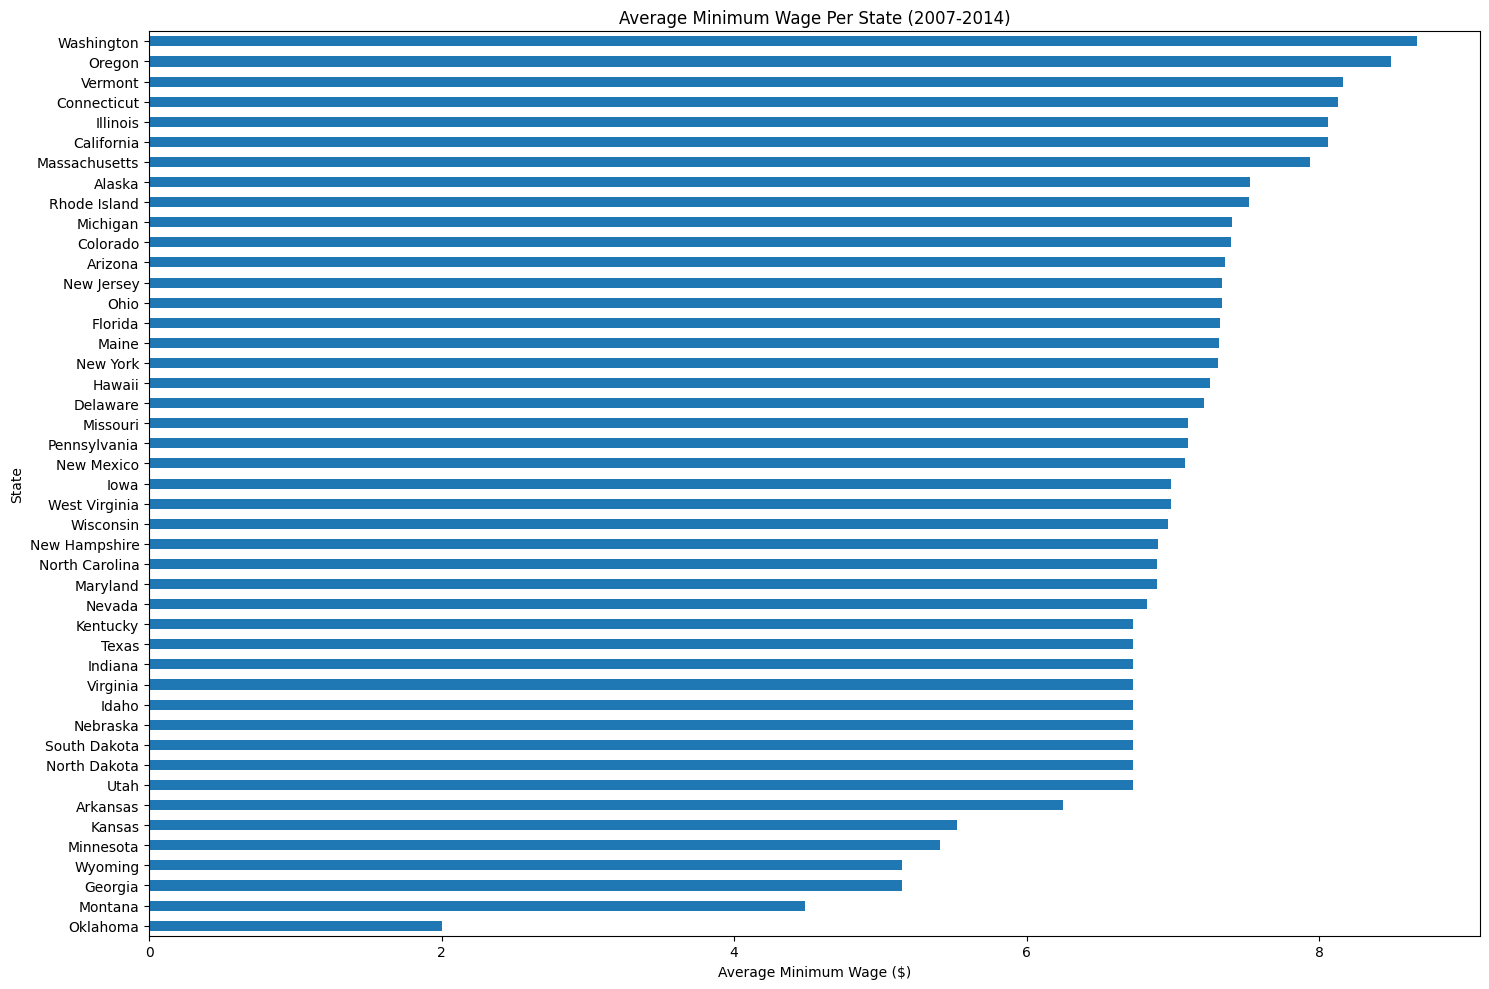

In [6]:
import matplotlib.pyplot as plt

## Average minimum wage of each state
avg_min_wage_per_state = Wage_Crime_Merged.groupby('State')['Min.Wage'].mean()
avg_min_wage_per_state.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
avg_min_wage_per_state.sort_values().plot(kind='barh') 
plt.title('Average Minimum Wage Per State (2007-2014)')
plt.xlabel('Average Minimum Wage ($)')
plt.ylabel('State')
plt.tight_layout()

plt.show()


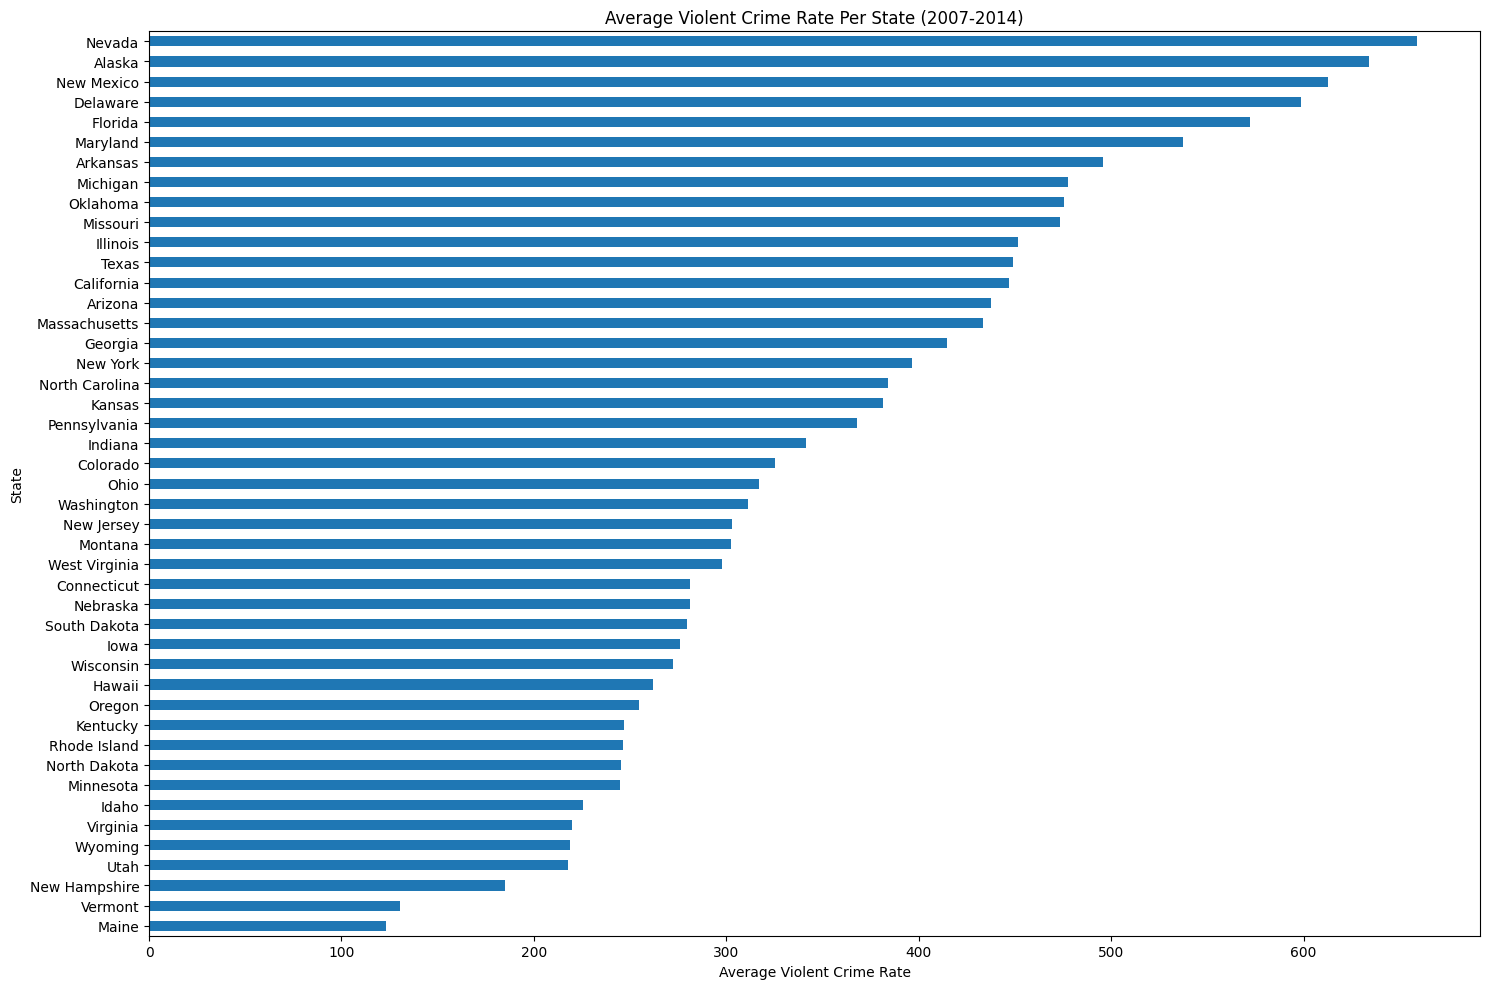

In [7]:
## Average crime rates of each state
#total violent crime rate
avg_violent_per_state = Wage_Crime_Merged.groupby('State')['Violent Crime Rate'].mean()
avg_violent_per_state.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
avg_violent_per_state.sort_values().plot(kind='barh')
plt.title('Average Violent Crime Rate Per State (2007-2014)')
plt.xlabel('Average Violent Crime Rate')
plt.ylabel('State')
plt.tight_layout()

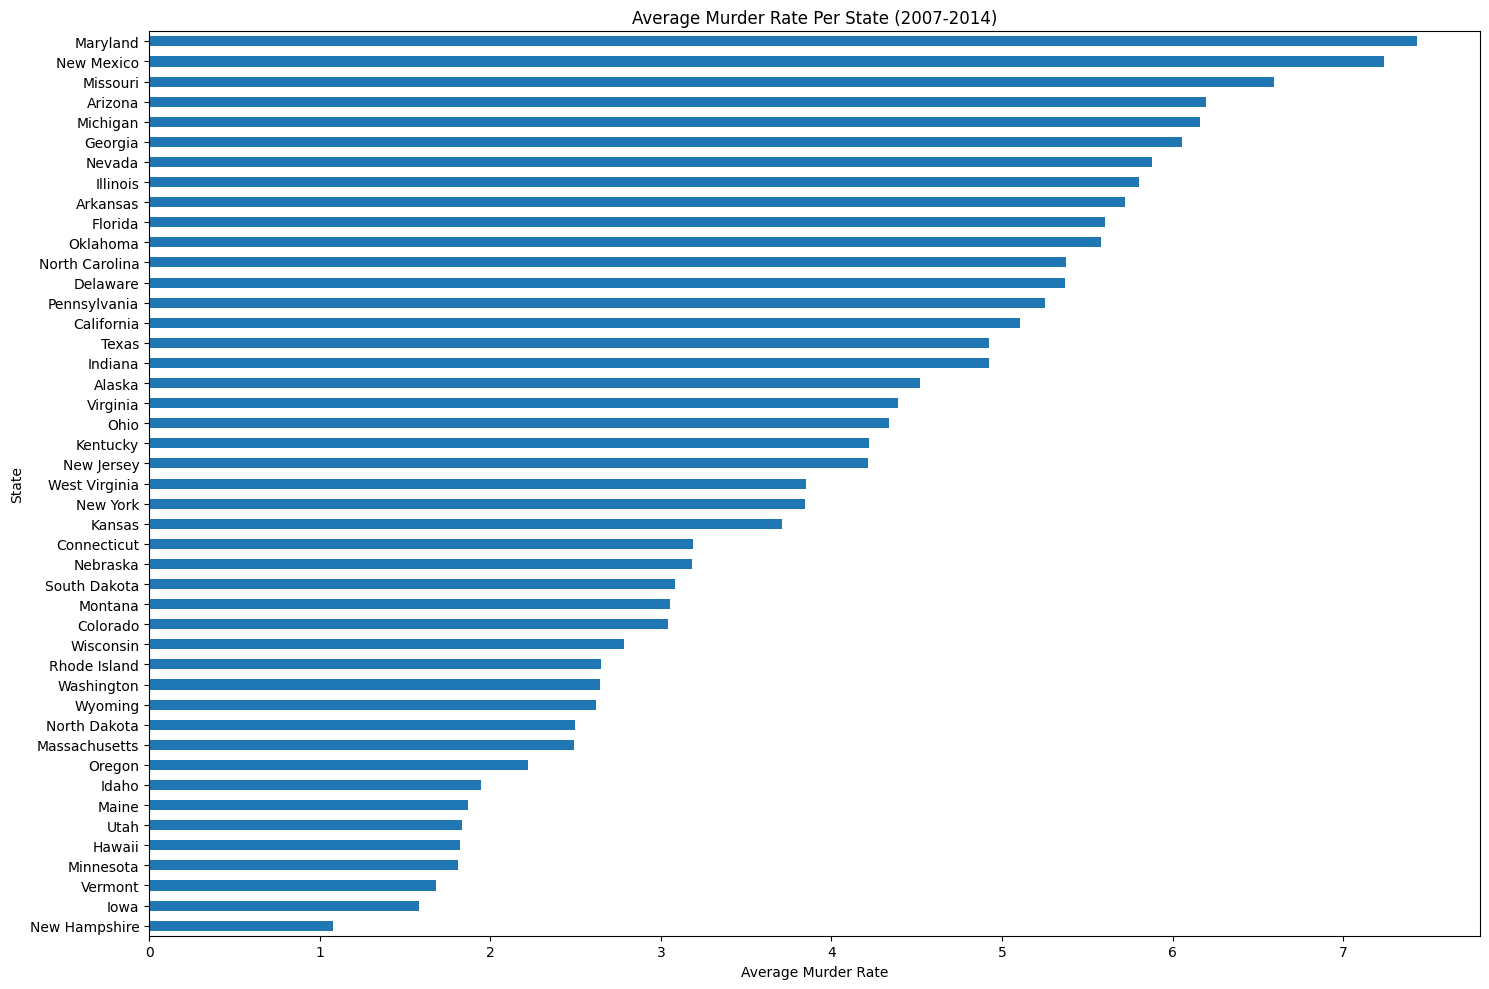

In [8]:
# Murder crime rate
avg_murder_per_state = Wage_Crime_Merged.groupby('State')['Murder Rate'].mean()
avg_murder_per_state.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
avg_murder_per_state.sort_values().plot(kind='barh')
plt.title('Average Murder Rate Per State (2007-2014)')
plt.xlabel('Average Murder Rate')
plt.ylabel('State')
plt.tight_layout()

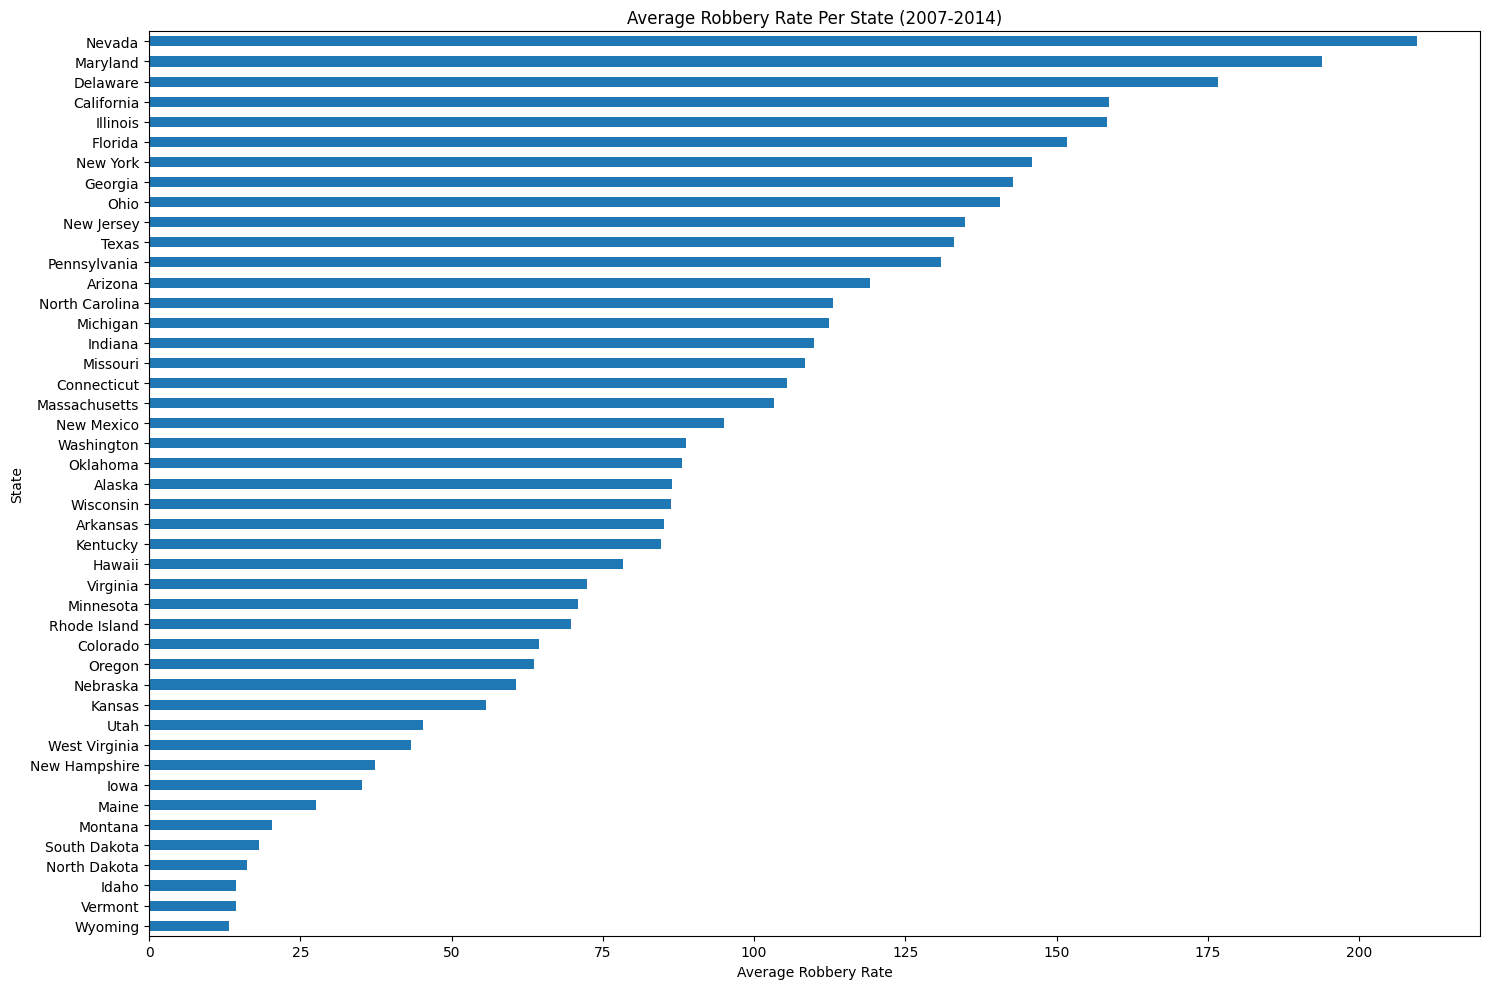

In [9]:
# robbery crime rate
avg_robbery_per_state = Wage_Crime_Merged.groupby('State')['Robbery Rate'].mean()
avg_robbery_per_state.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
avg_robbery_per_state.sort_values().plot(kind='barh')
plt.title('Average Robbery Rate Per State (2007-2014)')
plt.xlabel('Average Robbery Rate')
plt.ylabel('State')
plt.tight_layout()

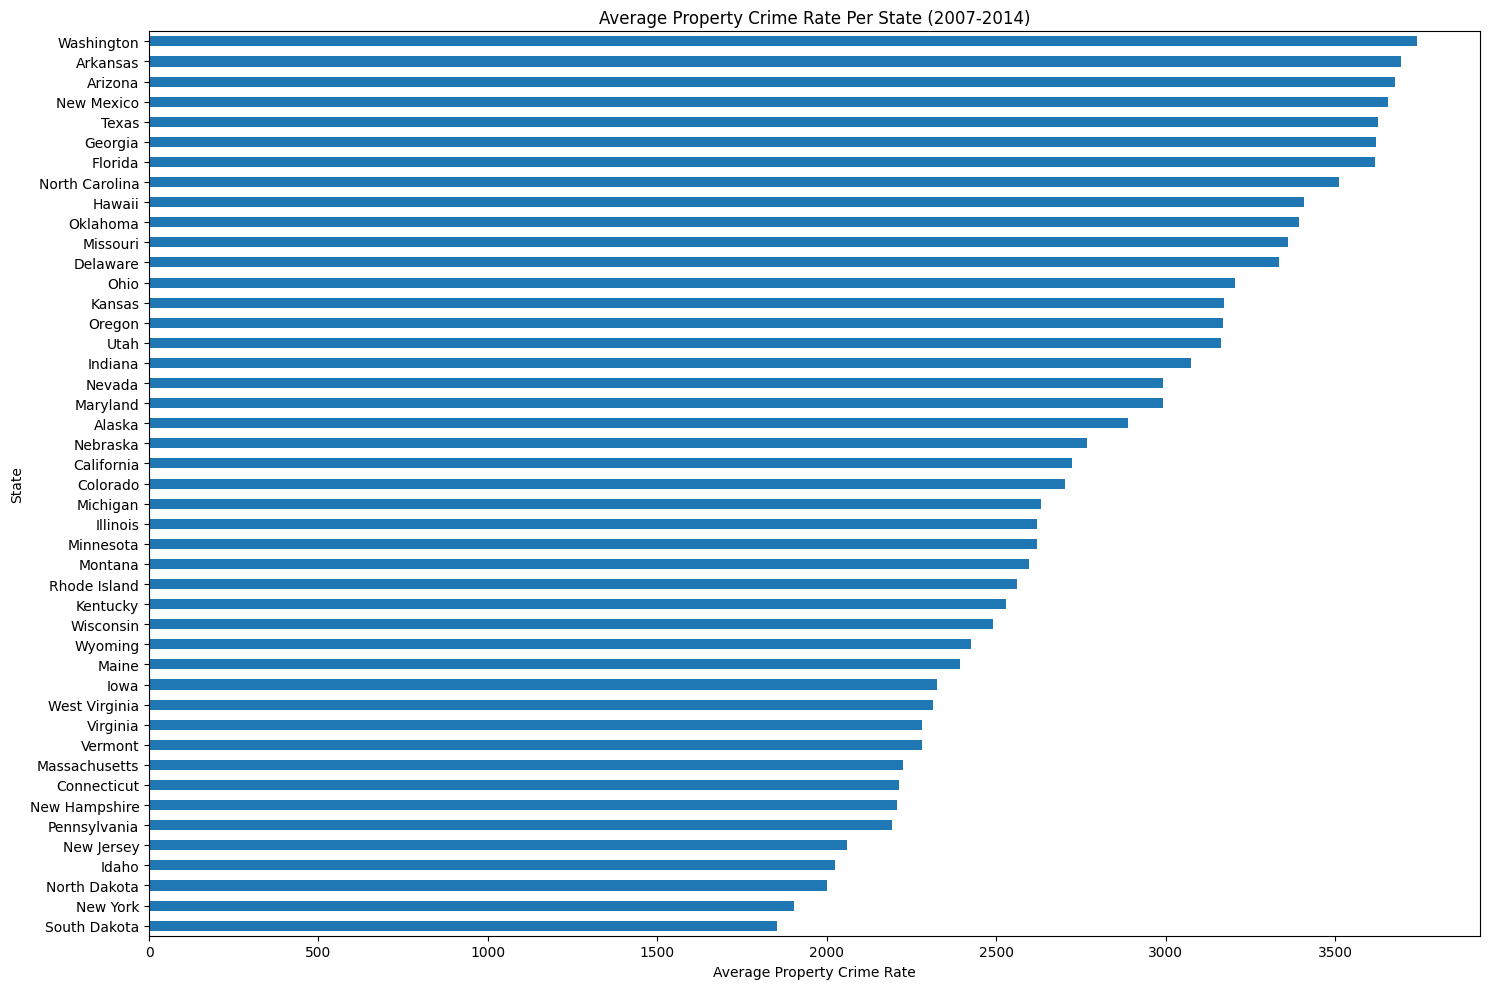

In [10]:
# Property crime rate
avg_property__per_state = Wage_Crime_Merged.groupby('State')['Property Crime Rate'].mean()
avg_property__per_state.sort_values(ascending=False)

plt.figure(figsize=(15, 10))
avg_property__per_state.sort_values().plot(kind='barh')
plt.title('Average Property Crime Rate Per State (2007-2014)')
plt.xlabel('Average Property Crime Rate')
plt.ylabel('State')
plt.tight_layout()

### Correlation analysis: relationship between the average minimum wage and various crime rates across states

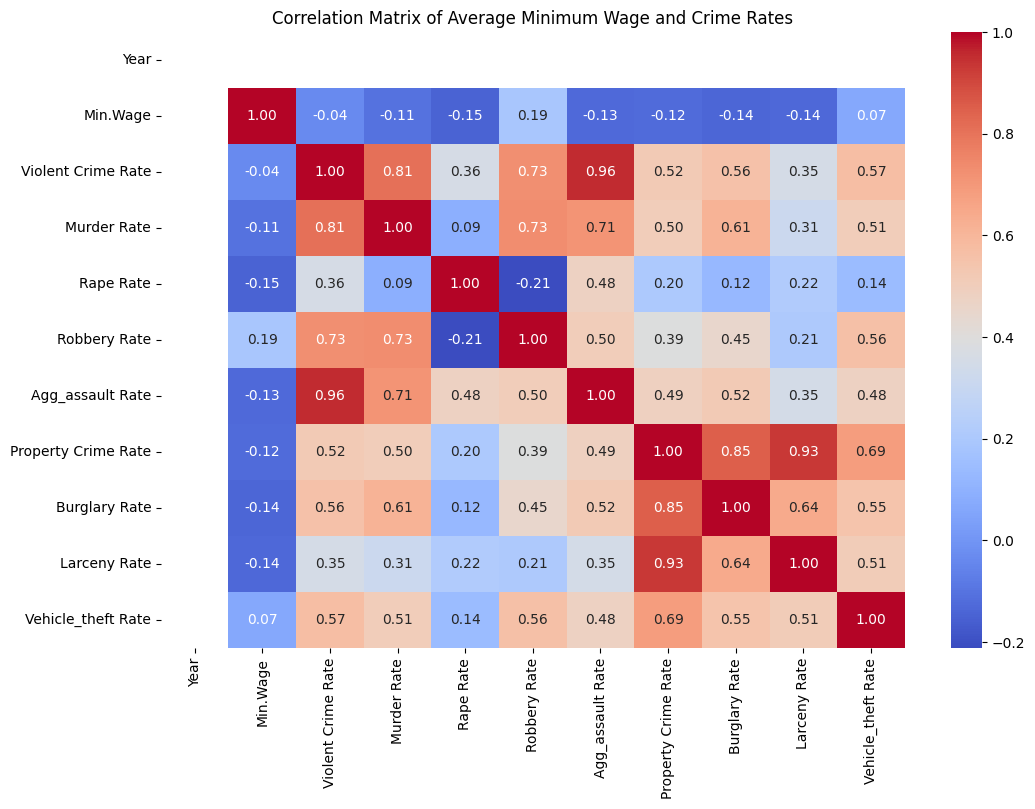

Min.Wage               1.000000
Robbery Rate           0.187533
Vehicle_theft Rate     0.065007
Violent Crime Rate    -0.035985
Murder Rate           -0.105606
Property Crime Rate   -0.122775
Agg_assault Rate      -0.129070
Larceny Rate          -0.135553
Burglary Rate         -0.140151
Rape Rate             -0.146142
Year                        NaN
Name: Min.Wage, dtype: float64

In [11]:
import seaborn as sns

# Calculating the average minimum wage and average crime rates per state
average_data = Wage_Crime_Merged.groupby('State').mean()
# Calculating the correlation matrix to see the relationship between average minimum wage and different crime rates
correlation_matrix = average_data.corr()

# For visualization, using a heatmap to display the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Average Minimum Wage and Crime Rates')
plt.show()

# Focusing on the correlations between Min.Wage and crime rates specifically
min_wage_correlations = correlation_matrix['Min.Wage'].sort_values(ascending=False)

min_wage_correlations

## Trend Analysis: how average crime rates and minimum wages in state-level have changed over years

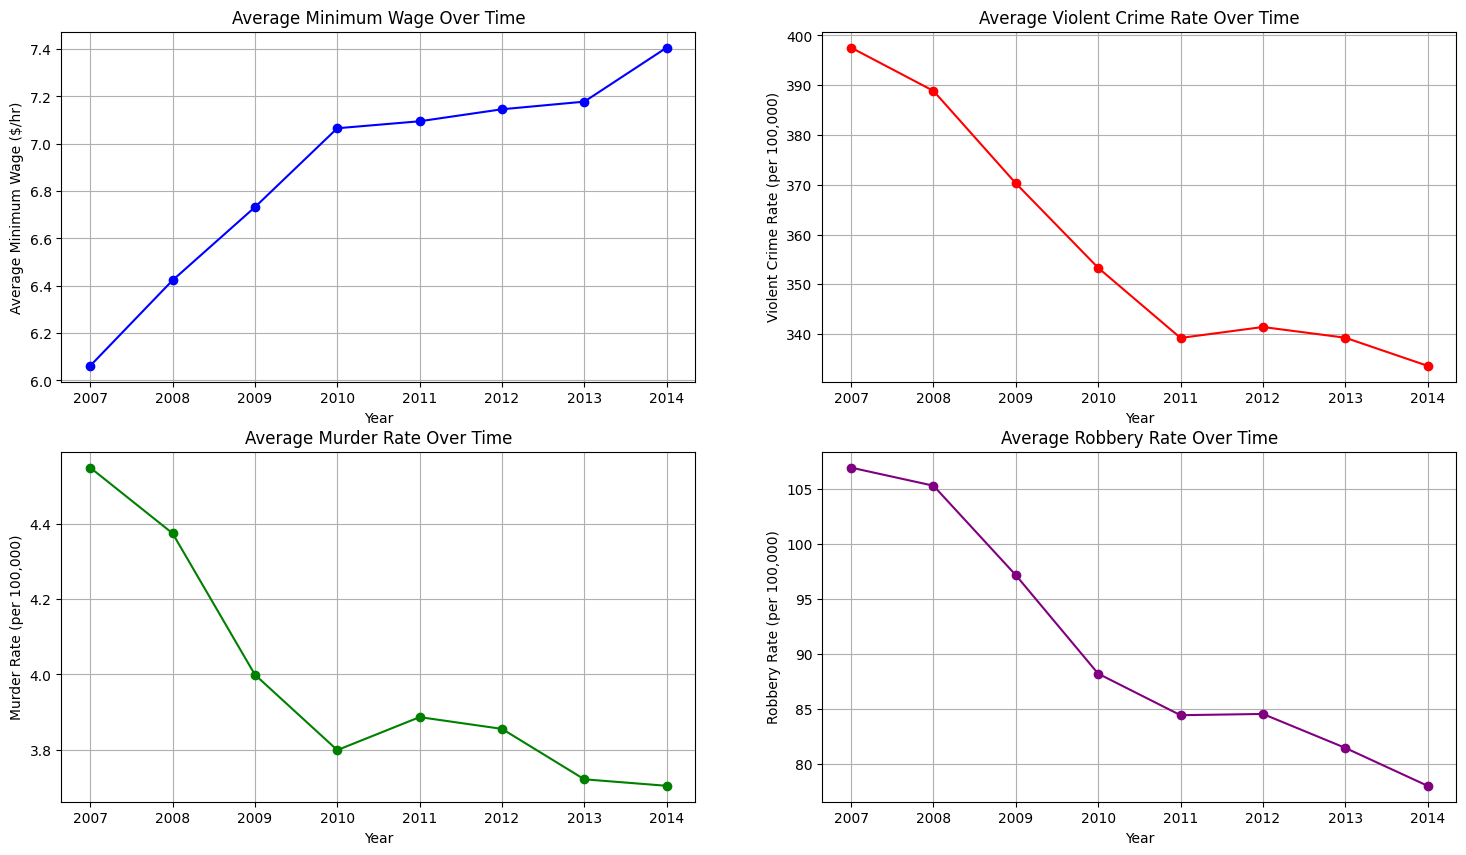

In [12]:
national_average_data = Wage_Crime_Merged.groupby('Year').mean()

# Plotting the trends for additional crime rates: Murder Rate, Robbery Rate, and Property Crime Rate

plt.figure(figsize=(18, 10))

# Trend for Average Minimum Wage
plt.subplot(2, 2, 1)
plt.plot(national_average_data.index, national_average_data['Min.Wage'], marker='o', color='blue')
plt.title('Average Minimum Wage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Minimum Wage ($/hr)')
plt.grid(True)

# Trend for Average Violent Crime Rate
plt.subplot(2, 2, 2)
plt.plot(national_average_data.index, national_average_data['Violent Crime Rate'], color='red', marker='o')
plt.title('Average Violent Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate (per 100,000)')
plt.grid(True)

# Trend for Average Murder Rate
plt.subplot(2, 2, 3)
plt.plot(national_average_data.index, national_average_data['Murder Rate'], color='green', marker='o')
plt.title('Average Murder Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Murder Rate (per 100,000)')
plt.grid(True)

# Trend for Average Robbery Rate
plt.subplot(2, 2, 4)
plt.plot(national_average_data.index, national_average_data['Robbery Rate'], color='purple', marker='o')
plt.title('Average Robbery Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Robbery Rate (per 100,000)')
plt.grid(True)


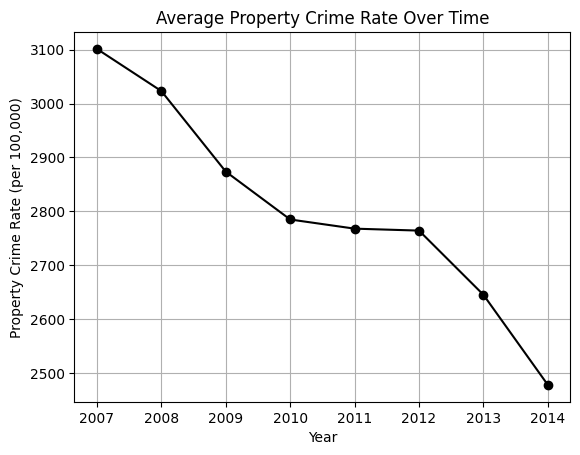

In [13]:
# Trend for Average Property Crime Rate
plt.plot(national_average_data.index, national_average_data['Property Crime Rate'], color='black', marker='o')
plt.title('Average Property Crime Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Property Crime Rate (per 100,000)')
plt.grid(True)


## Geographic Analysis

In [14]:
state_data = Wage_Crime_Merged.groupby('State').mean().reset_index()
state_data['State'] = state_data['State'].str.upper()
state_data

,State,Year,Min.Wage,Violent Crime Rate,Murder Rate,Rape Rate,Robbery Rate,Agg_assault Rate,Property Crime Rate,Burglary Rate,Larceny Rate,Vehicle_theft Rate
0,ALASKA,2010.5,7.52500,633.84250,4.51750,82.89000,86.44000,459.99500,2887.77625,448.66625,2198.17000,240.94125
1,ARIZONA,2010.5,7.35625,437.74875,6.19625,38.89625,119.25000,273.41000,3676.84250,811.73625,2460.24875,404.85750
2,ARKANSAS,2010.5,6.25000,495.59000,5.72250,47.90625,85.13375,356.82875,3694.00250,1094.86250,2393.03750,206.10250
3,CALIFORNIA,2010.5,8.06250,446.82500,5.10500,24.04750,158.63750,259.03625,2722.95125,614.60625,1654.27125,454.07375
4,COLORADO,2010.5,7.39625,325.53750,3.04125,46.75750,64.49125,211.24750,2703.89000,515.85625,1937.40125,250.63250
5,CONNECTICUT,2010.5,8.12500,281.14250,3.18875,20.76375,105.50250,151.68750,2212.52875,408.44000,1598.19500,205.89125
6,DELAWARE,2010.5,7.21250,598.68000,5.36750,38.51500,176.67500,378.12250,3334.65875,760.56875,2373.73000,200.36250
7,FLORIDA,2010.5,7.32000,572.07375,5.60125,32.10875,151.70750,382.65375,3616.04000,877.34250,2484.42625,254.26875
8,GEORGIA,2010.5,5.15000,414.75500,6.05750,24.27875,142.80250,241.61125,3618.96375,929.17750,2360.64000,329.14625
9,HAWAII,2010.5,7.25000,261.88625,1.82000,28.50250,78.32875,153.23500,3409.22500,629.17375,2424.02000,356.03375


In [15]:
# Load US state boundaries
import geopandas as gpd
shapefile = gpd.read_file('/work/States_shapefile.shp')
shapefile.iloc[0,6]


# Delete some states to merge with consistent state data
states_to_exclude = ['TENNESSEE', 'SOUTH CAROLINA', 'ALABAMA', 'LOUISIANA','MISSISSIPPI', 'DISTRICT OF COLUMBIA','HAWAII','ALASKA']
shapefile = shapefile[~shapefile['State_Name'].isin(states_to_exclude)]

In [16]:
states_to_exclude = ['HAWAII','ALASKA']
state_map = shapefile.merge(state_data, left_on='State_Name', right_on='State', how='left')
state_map

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,Year,Min.Wage,Violent Crime Rate,Murder Rate,Rape Rate,Robbery Rate,Agg_assault Rate,Property Crime Rate,Burglary Rate,Larceny Rate,Vehicle_theft Rate
0,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",ARIZONA,2010.5,7.35625,437.74875,6.19625,38.89625,119.25000,273.41000,3676.84250,811.73625,2460.24875,404.85750
1,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",ARKANSAS,2010.5,6.25000,495.59000,5.72250,47.90625,85.13375,356.82875,3694.00250,1094.86250,2393.03750,206.10250
2,5,None,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",CALIFORNIA,2010.5,8.06250,446.82500,5.10500,24.04750,158.63750,259.03625,2722.95125,614.60625,1654.27125,454.07375
3,6,ECOMAP,CO,COLORADO,F,924,"POLYGON ((-102.04446 37.64147, -102.04201 37.3...",COLORADO,2010.5,7.39625,325.53750,3.04125,46.75750,64.49125,211.24750,2703.89000,515.85625,1937.40125,250.63250
4,7,SIMS,CT,CONNECTICUT,F,925,"POLYGON ((-73.53039 41.52275, -73.51715 41.665...",CONNECTICUT,2010.5,8.12500,281.14250,3.18875,20.76375,105.50250,151.68750,2212.52875,408.44000,1598.19500,205.89125
5,8,None,DE,DELAWARE,P,926,"POLYGON ((-75.70707 38.55759, -75.71071 38.649...",DELAWARE,2010.5,7.21250,598.68000,5.36750,38.51500,176.67500,378.12250,3334.65875,760.56875,2373.73000,200.36250
6,10,None,FL,FLORIDA,P,928,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",FLORIDA,2010.5,7.32000,572.07375,5.60125,32.10875,151.70750,382.65375,3616.04000,877.34250,2484.42625,254.26875
7,11,None,GA,GEORGIA,N,929,"MULTIPOLYGON (((-85.13016 31.77885, -85.13156 ...",GEORGIA,2010.5,5.15000,414.75500,6.05750,24.27875,142.80250,241.61125,3618.96375,929.17750,2360.64000,329.14625
8,13,None,ID,IDAHO,P,931,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",IDAHO,2010.5,6.72500,225.46250,1.94750,35.96375,14.38750,173.16375,2023.98875,432.98500,1490.06500,100.94000
9,14,ACES,IL,ILLINOIS,F,932,"POLYGON ((-88.07159 37.51104, -88.08791 37.476...",ILLINOIS,2010.5,8.06250,451.73125,5.80125,30.38000,158.42500,257.12375,2620.01625,551.19000,1859.03625,209.78750


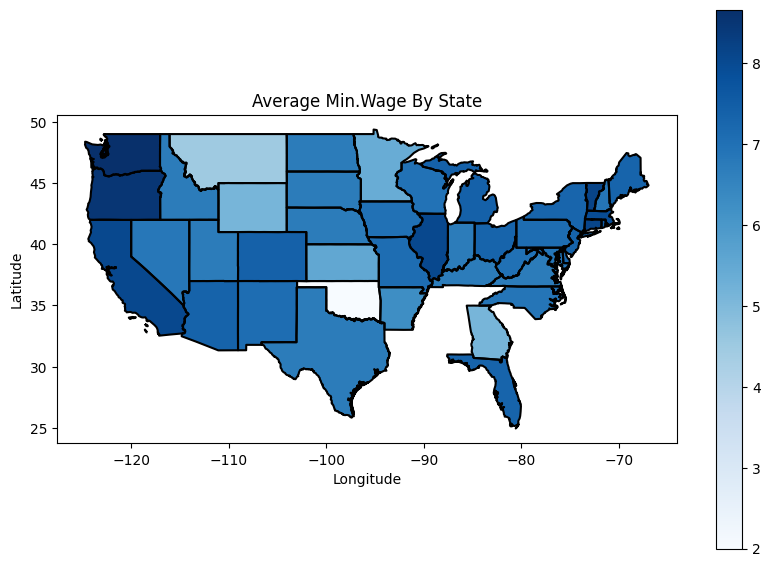

In [17]:
#Average Minimun Wage by State Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
shapefile.boundary.plot(ax=ax, linewidth=1.5, color='black')
state_map.plot(column='Min.Wage', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
plt.title('Average Min.Wage By State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

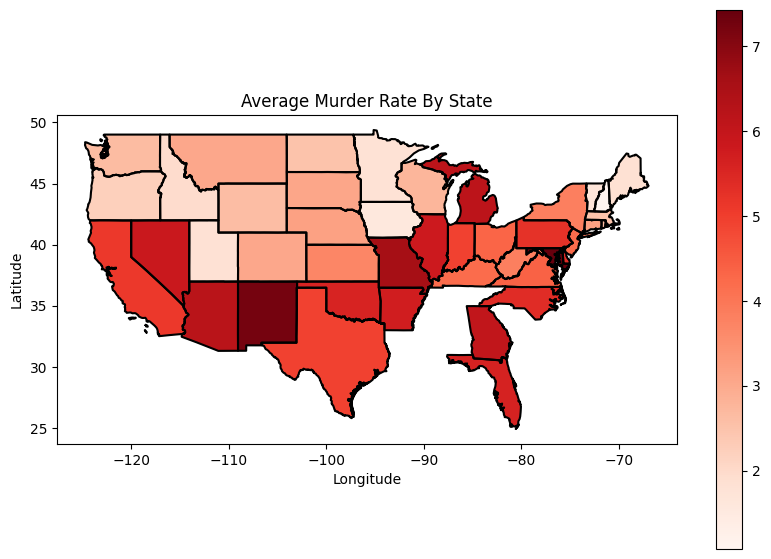

In [18]:
#Average Murder Rate by State Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
shapefile.boundary.plot(ax=ax, linewidth=1.5, color='black')
state_map.plot(column='Murder Rate', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
plt.title('Average Murder Rate By State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

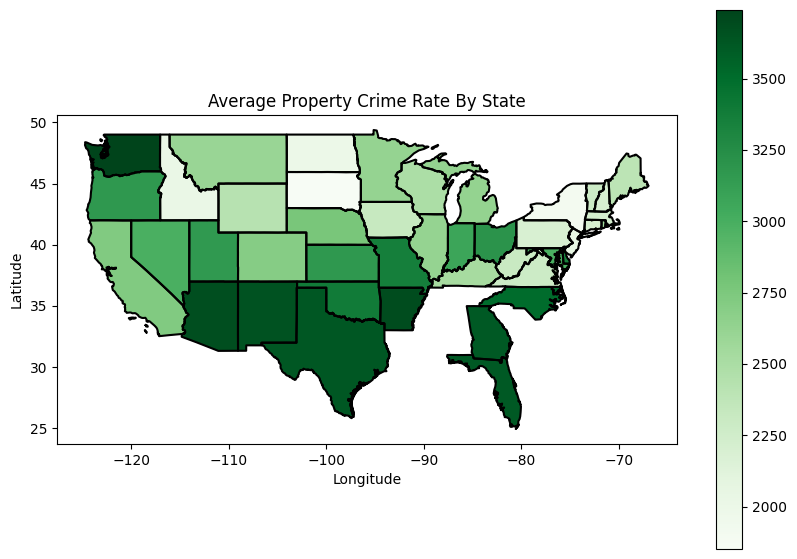

In [19]:
#Average Property Crime rate by State Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
shapefile.boundary.plot(ax=ax, linewidth=1.5, color='black')
state_map.plot(column='Property Crime Rate', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.5', legend=True)
plt.title('Average Property Crime Rate By State')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc24f09c-b05d-4947-bae7-ee90d26a9020' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>